# 1. (5 pts) Binary classification with logistic regression

- ### Please download heart_disease_train.csv and heart_disease_test.csv. The dataset is for cardiovascular study. The target variable is ‘TenYearCHD’, which shows whether the patient has 10-year risk of future coronary heart disease (CHD). You can find a description of the variables in cardiovascular.txt.

- ### This is the task of Binary classification with logistic regression. You need to build a logistic regression model from scratch to predict ‘TenYearCHD’.

- ### Before applying gradient descent method, you might need to fill out missing value and normalize variables.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
heart_train_df = pd.read_csv("data/heart_disease_train.csv")
heart_test_df = pd.read_csv("data/heart_disease_test.csv")
heart_train_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [4]:
heart_train_df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3306.000000,3390.000000,3365.000000,3348.000000,3390.000000,3390.000000,3390.000000,3346.000000,3390.000000,3390.000000,3374.000000,3389.000000,3075.000000,3390.000000
mean,0.433628,49.614159,1.981246,0.486726,8.962556,0.028375,0.004720,0.302065,0.024779,236.759713,132.126696,82.752065,25.793874,75.776335,82.023089,0.152212
std,0.495648,8.609617,1.023009,0.499897,12.030447,0.166067,0.068548,0.459221,0.155473,45.347259,22.047822,11.933836,4.045690,11.952094,23.934546,0.359280
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,74.500000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.500000,128.000000,82.000000,25.425000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
heart_train_df['TenYearCHD'].value_counts()

TenYearCHD
0    2874
1     516
Name: count, dtype: int64

### This shows that the data have class imbalance.

## Before applying gradient descent method, you might need to fill out missing value and normalize variables.

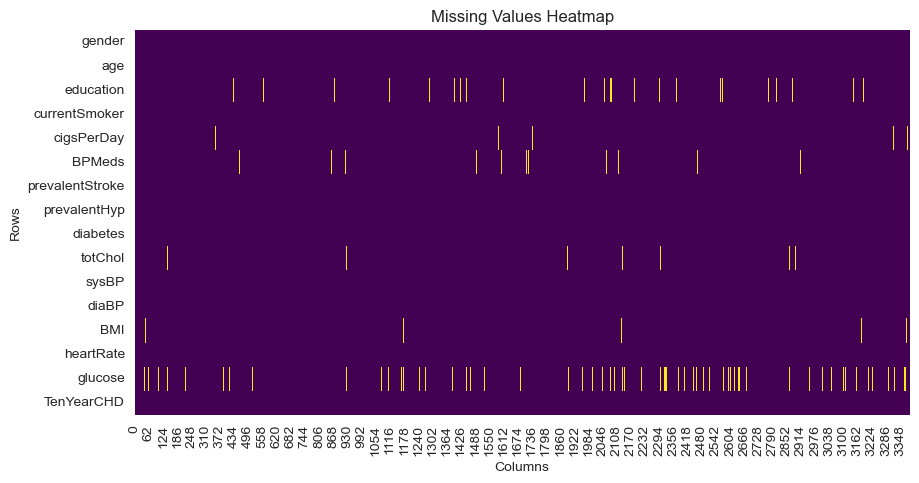

,column_name,column_dtype,distinct_values,missing_values,percent_missing,replacement_method
education,education,float64,4,84,2.477876,Mode
cigsPerDay,cigsPerDay,float64,32,25,0.737463,Mean/Median
BPMeds,BPMeds,float64,2,42,1.238938,Mode
totChol,totChol,float64,241,44,1.297935,Mean/Median
BMI,BMI,float64,1260,16,0.471976,Mean/Median
heartRate,heartRate,float64,71,1,0.029499,Mean/Median
glucose,glucose,float64,130,315,9.292035,Mean/Median


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


def find_missing_values(df):
    # Visualize missing values using a heatmap
    plt.figure(figsize=(10, 5), dpi=100)
    sns.heatmap(df.isnull().T, cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

    # Calculate missing values and distinct counts
    missing_values = df.isnull().sum()
    distinct_counts = df.nunique()

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'column_name': df.columns,
        'column_dtype': df.dtypes,
        'distinct_values': distinct_counts,
        'missing_values': missing_values,
        'percent_missing': missing_values / len(df) * 100,
        'replacement_method': [
            'Mode' if df[col].dtype == 'object' or distinct_counts[col] < 10 else 'Mean/Median'
            if missing_values[col] > 0 else None
            for col in df.columns
        ]
    })
    return results_df

missing_analysis_df = find_missing_values(heart_train_df)
missing_analysis_df[missing_analysis_df['percent_missing'] > 0.0].head(200)

## Missing Value Handling Approach

- if the distinct values are less than or equal to 10, treating that column as categorical value and then use Mode to replace the missing value
- Other wise using the Mean and Median.
    - To check if a distribution is Normal or Not I am using the visual inspection technique. After that I will use the mean value as replacement
    - Else using the Median value to replace the value
- In each of the above techniques using a subgroup of 6 columns - "gender", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes", which captures very distinct subset of people either with pre-existing condition or gender or behavior.
- Within that group I am using the above mentioned techniques for the missing value handling.

</br>

## Why This Subgroup
- I am using this as subgroup = "gender", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes"
- Each of the columns have two values, so the resolution is not very large.
-  I am using 5 columns and each column with 2 possible values, so there are 32 different subgroups can be formed, and this is good subgroup as the training data have 3300+ values, so on average each subgroup will have 100 items.
- If we look closer this subgroup closely, we can see that this sub-group is combination of demographics,  their behavioural traits, and pre-exiting condition.

In [7]:
sub_groups = ["gender", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes"]

## checking the distribution

column with missing values =  ['cigsPerDay' 'totChol' 'BMI' 'heartRate' 'glucose']


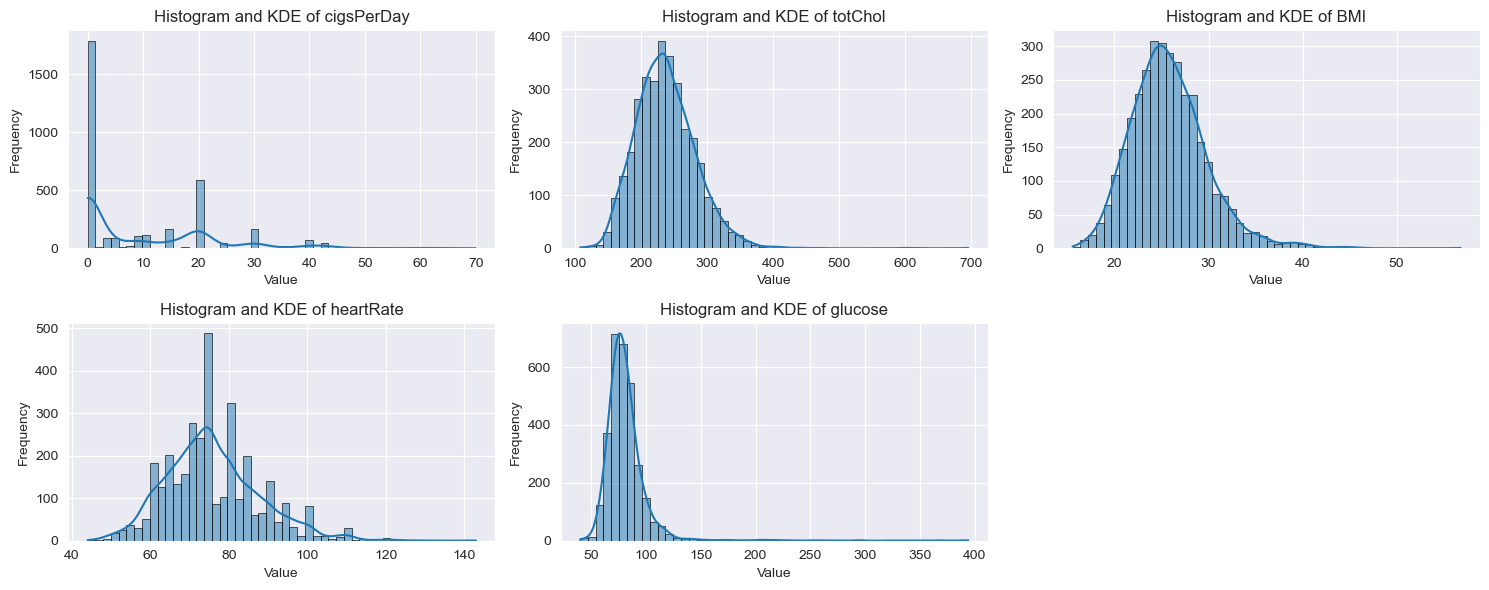

In [8]:
import math

print("column with missing values = ", missing_analysis_df[missing_analysis_df['replacement_method'] == 'Mean/Median']['column_name'].values)

columns_to_plot = missing_analysis_df[missing_analysis_df['replacement_method'] == 'Mean/Median']['column_name'].values
num_columns = len(columns_to_plot)

plots_per_row = 3
num_rows = math.ceil(num_columns / plots_per_row)

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15, num_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(columns_to_plot):
    sns.histplot(heart_train_df[col], bins=50, kde=True, edgecolor='black', ax=axes[idx])
    axes[idx].set_title(f'Histogram and KDE of {col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
"""
based on the plots visual inspection,  
    - we can see that BMI, totChol, heartRate looks normal distribution so we will use Mean values to replace them , 
    - and 'cigsPerDay'  and  'glucose' are skewed so use the median value. Specially glucose is very heavily right skewed.
"""
replacement_method_dict = {'totChol': 'Mean', 'BMI': 'Mean', 'heartRate': 'Mean', 
                           'cigsPerDay': 'Median', 'glucose': 'Median'}

print(replacement_method_dict)

{'totChol': 'Mean', 'BMI': 'Mean', 'heartRate': 'Mean', 'cigsPerDay': 'Median', 'glucose': 'Median'}


In [10]:
import numpy as np

class MissingValueImputer:

    def __init__(self, train_data, subgroup_cols=[]):
        """

        Taken this idea from Assignment-1 to use different methods for missing value handling.
        
        Initialize the imputer with training data and optional subgroup columns which will be used for the handling missing values.
        Parameters:
            - train_data: DataFrame to analyze for missing value replacement.
            - subgroup_cols: List of column names to use for subgroup-based replacement.
        """
        self.train_data = train_data
        self.subgroup_cols = subgroup_cols
        self.replacement_values = {}

    def fit(self):
        """
        Calculate replacement values for each column in the training data.
        Stores the replacement values for each subgroup (if specified) or globally otherwise.
        """
        columns_with_missing = self.train_data.isnull().sum()
        columns_with_missing = columns_with_missing[columns_with_missing > 0].index

        for col in columns_with_missing:
            if self.subgroup_cols:
                # Subgroup-based replacement using multiple subgroup columns
                replacement_method = {}
                for subgroup, group_data in self.train_data.groupby(self.subgroup_cols):
                    if self.train_data[col].dtype == 'object' or self.train_data[col].nunique() < 10:
                        replacement_value = group_data[col].mode().iloc[0] if not group_data[col].mode().empty else np.nan
                    else:
                        method = replacement_method_dict[col]
                        replacement_value = group_data[col].median() if method == 'Median' else group_data[col].mean()
                    replacement_method[subgroup] = replacement_value
                self.replacement_values[col] = replacement_method
            else:
                # Global replacement
                if self.train_data[col].dtype == 'object' or self.train_data[col].nunique() < 10:
                    self.replacement_values[col] = self.train_data[col].mode().iloc[0] if not self.train_data[col].mode().empty else np.nan
                else:
                    method = replacement_method_dict[col]
                    self.replacement_values[col] = self.train_data[col].median() if method == 'Median' else self.train_data[col].mean()


    def replace(self, data):
        for col, replacement in self.replacement_values.items():
            if isinstance(replacement, dict):  # Subgroup-based replacement
                data[col] = data.groupby(self.subgroup_cols)[col].apply(
                    lambda group: group.fillna(replacement.get(tuple(group.name), np.nan))
                ).reset_index(level=self.subgroup_cols, drop=True)
            else:
                # Global replacement
                data[col] = data[col].fillna(replacement)
        return data


imputer = MissingValueImputer(heart_train_df, subgroup_cols=sub_groups)
imputer.fit()

heart_train_imputed_df = imputer.replace(heart_train_df.copy())
heart_test_imputed_df = imputer.replace(heart_test_df.copy())

print(f"Train : Null values after imputations = {heart_train_imputed_df.isnull().sum().sum()}")
print(f"Test : Null values after imputations = {heart_test_imputed_df.isnull().sum().sum()}")



Train : Null values after imputations = 0
Test : Null values after imputations = 0


In [11]:
heart_train_imputed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3390.0,0.433628,0.495648,0.00,0.00,0.000,1.000000,1.0
age,3390.0,49.614159,8.609617,32.00,42.00,49.000,57.000000,70.0
education,3390.0,1.961652,1.019580,1.00,1.00,2.000,3.000000,4.0
currentSmoker,3390.0,0.486726,0.499897,0.00,0.00,0.000,1.000000,1.0
cigsPerDay,3390.0,9.026254,12.010675,0.00,0.00,0.000,20.000000,70.0
BPMeds,3390.0,0.028024,0.165065,0.00,0.00,0.000,0.000000,1.0
prevalentStroke,3390.0,0.004720,0.068548,0.00,0.00,0.000,0.000000,1.0
prevalentHyp,3390.0,0.302065,0.459221,0.00,0.00,0.000,1.000000,1.0
diabetes,3390.0,0.024779,0.155473,0.00,0.00,0.000,0.000000,1.0
totChol,3390.0,236.766500,45.069149,107.00,206.00,233.500,263.000000,696.0


### -  Normalize Data

- I am using the normalization using mean and standard deviation values.
- using the same mean and std for the test data.
- as we can see in the describe method output all the values for count are same.

In [12]:
X_heart_train = heart_train_imputed_df[heart_train_imputed_df.columns[:-1]]
y_heart_train = heart_train_imputed_df[heart_train_imputed_df.columns[-1]]
X_heart_test = heart_test_imputed_df[heart_test_imputed_df.columns[:-1]]
y_heart_test = heart_test_imputed_df[heart_test_imputed_df.columns[-1]]


X_heart_mean = X_heart_train.mean()
X_heart_std = X_heart_train.std()

X_heart_train = (X_heart_train - X_heart_mean) / X_heart_std
X_heart_test = (X_heart_test - X_heart_mean) / X_heart_std

print(f"{X_heart_train.shape = }, {y_heart_train.shape = }")
print(f"{X_heart_test.shape = }, {y_heart_test.shape = }")


X_heart_train.shape = (3390, 15), y_heart_train.shape = (3390,)
X_heart_test.shape = (848, 15), y_heart_test.shape = (848,)


## 1-3 Please build a gradient descent algorithm based on the following formulas. Instead, you may build an algorithm based on the matrix formula.

## Please print out the Cost function J for every iteration (until 10 epochs) for the train dataset

Model = learning_rate=0.02,iterations=2000,func=sigmoid,batch_size=100 
	Starting the gradient descent algo at 2024-12-02 03:31:08.765442
		Epoch    1 / 2000, Cost: 0.6902
		Epoch    2 / 2000, Cost: 0.6884
		Epoch    3 / 2000, Cost: 0.6859
		Epoch    4 / 2000, Cost: 0.6836
		Epoch    5 / 2000, Cost: 0.6813
		Epoch    6 / 2000, Cost: 0.6791
		Epoch    7 / 2000, Cost: 0.6768
		Epoch    8 / 2000, Cost: 0.6745
		Epoch    9 / 2000, Cost: 0.6722
		Epoch   10 / 2000, Cost: 0.6701
		Epoch  201 / 2000, Cost: 0.4784
		Epoch  401 / 2000, Cost: 0.4401
		Epoch  601 / 2000, Cost: 0.4306
		Epoch  801 / 2000, Cost: 0.4278
		Epoch 1001 / 2000, Cost: 0.4270
		Epoch 1201 / 2000, Cost: 0.4267
		Epoch 1401 / 2000, Cost: 0.4266
		Epoch 1601 / 2000, Cost: 0.4265
		Epoch 1801 / 2000, Cost: 0.4265
		Epoch 2000 / 2000, Cost: 0.4266
	End time for the gradient descent: 2024-12-02 03:31:11.374303, total time in ms : 2608.861


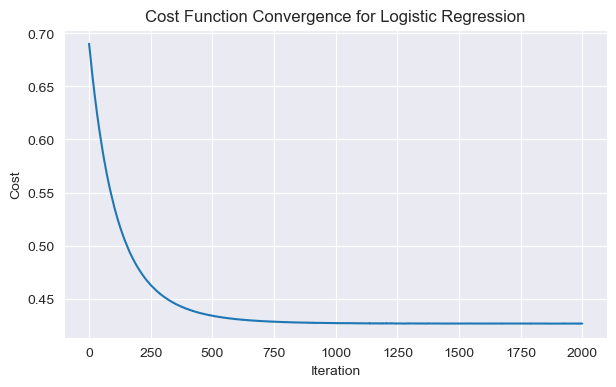

In [13]:
from datetime import datetime


class LogisticRegressionVectorized:

    def __init__(self, learning_rate=0.01, num_iterations=1000, func='sigmoid', batch_size=100, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.func = func
        self.batch_size = batch_size
        self.verbose = verbose
        self.weights = None
        self.costs = []

    def params(self):
        return f"learning_rate={self.learning_rate},iterations={self.num_iterations},func={self.func},batch_size={self.batch_size}"

    def logistic_function(self, z):
        if self.func == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif self.func == 'bipolar_sigmoid':
            return (2 / (1 + np.exp(-z))) - 1
        elif self.func == 'tanh_scaled':
            return 0.5 * (np.tanh(z) + 1)
        else:
            raise ValueError(f"Unsupported logistic function: {self.func}")

    # def logistic_function(self, z):
    #     if self.func == 'sigmoid':
    #         return 1 / (1 + np.exp(-z))
    #     elif self.func == 'bipolar_sigmoid':
    #         return (2 / (1 + np.exp(-z))) - 1
    #     elif self.func == 'tanh_scaled':
    #         return 0.5 * (np.tanh(z) + 1)
    #     elif self.func == 'weighted_sigmoid':
    #         # Adds a weight to adjust for imbalance
    #         weight = self.weight if hasattr(self, 'weight') else 1.0
    #         return 1 / (1 + np.exp(-weight * z))
    #     elif self.func == 'leaky_sigmoid':
    #         # A leaky version of sigmoid for imbalanced adjustments
    #         alpha = 0.1  # Leakiness factor for small gradient correction
    #         return np.where(z >= 0, 1 / (1 + np.exp(-z)), alpha * z)
    #     elif self.func == 'gamma_sigmoid':
    #         # Gamma sigmoid emphasizes imbalance handling
    #         gamma = 2.0  # Adjust gamma for stronger or weaker correction
    #         return 1 / (1 + np.exp(-gamma * z))
    #     elif self.func == 'log_sigmoid':
    #         # Log-scaled sigmoid, emphasizing outliers
    #         epsilon = 1e-7
    #         sigmoid = 1 / (1 + np.exp(-z))
    #         return np.log(sigmoid + epsilon)
    #     elif self.func == 'custom_softmax':
    #         # Mimics softmax for multiple class imbalance adjustment
    #         exp_z = np.exp(z - np.max(z))  # Prevents overflow
    #         return exp_z / np.sum(exp_z)
    #     elif self.func == 'focal_sigmoid':
    #         # Applies a focal loss concept in sigmoid
    #         gamma = 2.0  # Focus parameter
    #         sigmoid = 1 / (1 + np.exp(-z))
    #         return sigmoid * (1 - sigmoid) ** gamma
    #     else:
    #         raise ValueError(f"Unsupported logistic function: {self.func}")
    #

    def add_intercept(self, X):
        # adding bias in the features so that we dont have to compute bias separtely
        return np.c_[np.ones(X.shape[0]), X]

    def compute_cost(self, y_actual, y_pred):
        """
        The cost function is defined as:
            J = - (1/m) * Σ [y_i * log(ŷ_i) + (1 - y_i) * log(1 - ŷ_i)]
        Where:
            - m: Number of samples
            - y_i: Actual label for the i-th sample (0 or 1)
            - ŷ_i: Predicted probability for the i-th sample
        """
        num_samples = len(y_actual)
        cost = - (1 / num_samples) * np.sum(y_actual * np.log(y_pred) + (1 - y_actual) * np.log(1 - y_pred))
        return cost

    def update_weights(self, y_actual, y_pred, X):
        """
        The weight update rule is defined as:
            ∂J/∂w_j = (1/m) * Σ (y_predicted_i - y_actual_i) * x_ij
            W_j(t) = W_j(t-1) - α * (∂J/∂W_j)    
        Where:
            - W_j(t): Weight for the j-th feature at iteration t
            - W_j(t-1): Weight for the j-th feature at iteration t-1
            - α: Learning rate
            - ∂J/∂W_j: Partial derivative of the cost function with respect to the j-th weight
        """
        num_samples = len(y_actual)
        error = y_pred - y_actual
        dw = (1 / num_samples) * np.dot(X.T, error)
        self.weights -= self.learning_rate * dw

    def _predict_scores(self, X):
        linear_model = np.dot(X, self.weights)
        return self.logistic_function(linear_model)

    def predict_scores(self, X):
        X = self.add_intercept(X)
        linear_model = np.dot(X, self.weights)
        return self.logistic_function(linear_model)

    def predict(self, X):
        predictions = self.predict_scores(X)
        return (predictions > 0.5).astype(int)

    # def fit(self, X, y):
    #     X = self.add_intercept(X)
    #     num_samples, num_features = X.shape
    #     self.weights = np.zeros(num_features)
    #
    #     start = datetime.now()
    #     print(f"Model = {self.params()} \n\tStarting the gradient descent algo at {start}")
    #     for i in range(self.num_iterations):
    #         predictions = self._predict_scores(X)
    #         self.update_weights(y, predictions, X)
    #         cost = self.compute_cost(y, predictions)
    #         self.costs.append(cost)
    #         if self.verbose and (i < 10 or i % (self.num_iterations/10) == 0 or i == self.num_iterations - 1):
    #             print(f'\t\tEpoch {i + 1:4} / {self.num_iterations:4}, Cost: {cost:>2.4f}')
    #     end = datetime.now()
    #     print(f"\tEnd time for the gradient descent: {end}, total time in ms : {(end - start).total_seconds() * 1000} ")
    #

    def fit(self, X, y, batch_size=None):
        X = self.add_intercept(X)
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)

        if batch_size is None or batch_size > num_samples:
            batch_size = num_samples  # Full-batch gradient descent

        start = datetime.now()
        print(f"Model = {self.params()} \n\tStarting the gradient descent algo at {start}")

        for i in range(self.num_iterations):
            # Shuffle the data at the start of each epoch for stochastic behavior
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            for start_idx in range(0, num_samples, batch_size):
                end_idx = min(start_idx + batch_size, num_samples)
                X_batch = X[start_idx:end_idx]
                y_batch = y[start_idx:end_idx]

                # Perform predictions and weight updates for the batch
                predictions = self._predict_scores(X_batch)
                self.update_weights(y_batch, predictions, X_batch)

            # Compute cost on the full dataset after each epoch
            predictions = self._predict_scores(X)
            cost = self.compute_cost(y, predictions)
            self.costs.append(cost)

            if self.verbose and (i < 10 or i % (self.num_iterations / 10) == 0 or i == self.num_iterations - 1):
                print(f'\t\tEpoch {i + 1:4} / {self.num_iterations:4}, Cost: {cost:>2.4f}')

        end = datetime.now()
        print(f"\tEnd time for the gradient descent: {end}, total time in ms : {(end - start).total_seconds() * 1000}")

    def plot_cost(self):
        plt.figure(figsize=(7, 4), dpi=100)
        plt.plot(range(len(self.costs)), self.costs)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Convergence for Logistic Regression')
        plt.grid(True)
        plt.show()


logistic_regression = LogisticRegressionVectorized(learning_rate=0.02, num_iterations=2000, batch_size=100, verbose=True)
logistic_regression.fit(X_heart_train, y_heart_train)
logistic_regression.plot_cost()


## Observations -
- As we can see that Vectorized is very fast in comparision of the Iterative approach. As the number of examples will increase the iterative approach will get slower.

# (3pts) Bonus assignment

# Please tune your hyperparameters (learning rate, batch size, number of epochs, etc.) to get the best results of accuracy, precision, and recall for test dataset.

## Please plot ROC curve and calculate AUC for train and test dataset for your best result.
-  NOTE: You need to get more than 10 data points for ROC curve.
-  Please include the curve corresponding to the base binary classification model.
- Please do not use any package for ROC curve and AUC calculation. You need to draw ROC curve using Matplotlib and calculate AUC from scratch.

## Please print out confusion matrix and its corresponding accuracy, precision, and recall for the train and test dataset after the last iteration.

In [14]:
import matplotlib.pyplot as plt


# def plot_confusion_matrix(TN, FP, FN, TP, message):
#     plt.figure(figsize=(3, 2), dpi=100)
#     cm = np.array([[TN, FP], [FN, TP]])
#     plt.imshow(cm, cmap='Blues', alpha=0.7)
#     plt.title(f"Confusion Matrix on {message} data", fontsize=16)
#     plt.xticks([0, 1], ['Negative', 'Positive'], fontsize=12)
#     plt.yticks([0, 1], ['Negative', 'Positive'], fontsize=12)
#     plt.xlabel("Predicted Label", fontsize=14)
#     plt.ylabel("True Label", fontsize=14)
#     plt.grid(False)
#     for i in range(2):
#         for j in range(2):
#             plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=14, color='black')
#
#     plt.colorbar()
#     plt.show()
#
#
# def plot_roc_curve(fpr, tpr, auc, model_name="Model"):
#     plt.figure(figsize=(4, 3))
#     plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
#     plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend(loc='lower right')
#     plt.grid(True)
#     plt.show()

def plot_confusion_matrix(TN, FP, FN, TP, message, ax=None):
    cm = np.array([[TN, FP], [FN, TP]])
    if ax is None:
        fig, ax = plt.subplots(figsize=(3, 2), dpi=100)

    im = ax.imshow(cm, cmap='Blues', alpha=0.7)
    ax.set_title(f"Confusion Matrix on {message} data", fontsize=16)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Negative', 'Positive'], fontsize=12)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Negative', 'Positive'], fontsize=12)
    ax.set_xlabel("Predicted Label", fontsize=14)
    ax.set_ylabel("True Label", fontsize=14)

    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', fontsize=14, color='black')

    if ax.get_figure():
        ax.get_figure().colorbar(im, ax=ax)



def plot_roc_curve(fpr, tpr, auc, model_name="Model", ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(4, 3))

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    ax.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend(loc='lower right')
    ax.grid(True)


def calculate_roc_auc(y_actual, y_scores, model_name="", verbose=False):
    thresholds, p = [], 0.0 #np.linspace(0, 1, 100)
    while p <= 1.0:
        thresholds.append(p)
        p += 0.01

    tpr_list = []
    fpr_list = []

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        tp = np.sum((y_actual == 1) & (y_pred == 1))
        fp = np.sum((y_actual == 0) & (y_pred == 1))
        fn = np.sum((y_actual == 1) & (y_pred == 0))
        tn = np.sum((y_actual == 0) & (y_pred == 0))
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    sorted_indices = np.argsort(fpr_list)
    fpr_list = np.array(fpr_list)[sorted_indices]
    tpr_list = np.array(tpr_list)[sorted_indices]

    # Calculate AUC
    auc = np.trapz(tpr_list, fpr_list)
    if verbose:
        plot_roc_curve(fpr_list, tpr_list, auc, model_name)
    return auc, fpr_list, tpr_list,


def print_metrics(metrics, message, verbose=False):
    if verbose:
        print(f"Metrics on the {message} data:")
        for class_label, class_metrics in metrics.items():
            metrics_str = ""
                # print(class_metrics)
            metrics_str += f"{class_label}:"
            for key, value in class_metrics.items():
                if value is not None:
                    metrics_str += f"\t{key:}: {value:<8.3f}"
            print(metrics_str)


def compute_metrics(y_true, y_pred, y_scores=None, message="", verbose=True):
    """
    Compute evaluation metrics (TP, FP, TN, FN, Precision, Recall, F1, Accuracy, ROC AUC)
    for each class in a binary classification problem and optionally plot the confusion matrix.
    """
    # Confusion Matrix Components
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Metrics for Class 1 (Positive Class)
    precision_pos = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_pos = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score_pos = (2 * precision_pos * recall_pos) / (precision_pos + recall_pos) if (precision_pos + recall_pos) > 0 else 0

    # Metrics for Class 0 (Negative Class)
    precision_neg = TN / (TN + FN) if (TN + FN) > 0 else 0
    recall_neg = TN / (TN + FP) if (TN + FP) > 0 else 0
    f1_score_neg = (2 * precision_neg * recall_neg) / (precision_neg + recall_neg) if (precision_neg + recall_neg) > 0 else 0

    # Overall Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    roc_auc, fpr_list, tpr_list = calculate_roc_auc(y_true, y_scores, verbose)

    if verbose:
        fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
        plot_confusion_matrix(TN, FP, FN, TP, message=message, ax=axs[0])
        plot_roc_curve(fpr_list, tpr_list, roc_auc, model_name=message, ax=axs[1])
        plt.tight_layout()
        plt.show()

    # # ROC AUC Score

    # roc_auc = roc_auc_score(y_true, y_scores) if y_scores is not None else None

    metrics = {
        'Class 1 (Positive)': {
            'TP': TP,
            'FP': FP,
            'FN': FN,
            'Precision': precision_pos,
            'Recall': recall_pos,
            'F1 Score': f1_score_pos,
        },
        'Class 0 (Negative)': {
            'TN': TN,
            'FP': FP,
            'FN': FN,
            'Precision': precision_neg,
            'Recall': recall_neg,
            'F1 Score': f1_score_neg,
        },
        'Overall': {
            'Accuracy': accuracy,
            'ROC AUC': roc_auc,
        }
    }

    print_metrics(metrics, message, verbose)
    return metrics


In [ ]:
from itertools import product


def custom_grid_search(X_train, y_train, X_test, y_test, param_grid, metric='Accuracy'):

    best_params = None
    best_metric = 0
    best_model = None
    best_model_id = ""
    models = {}
    for learning_rate, num_iterations, batch_size, activation_func in product(
        param_grid['learning_rate'], param_grid['num_iterations'], param_grid['batch_size'], param_grid['activation_func']
    ):
        print("")
        model = LogisticRegressionVectorized(learning_rate=learning_rate, num_iterations=num_iterations, func=activation_func,  batch_size=batch_size, verbose=False)
        model.fit(X_train, y_train)

        y_pred_prob = model.predict_scores(X_test)
        y_pred_label = model.predict(X_test)
        metrics = compute_metrics(y_test, y_pred_label, y_pred_prob, message="test", verbose=False)
        models[model.params()] = model, metrics
        print(f"\tModel test accuracy = {metrics['Overall']['Accuracy']:.4}, roc = {metrics['Overall']['ROC AUC']:.4}")

        if metrics['Overall'][metric] > best_metric:
            print("\n\t------------- New Best -----------\n")
            best_metric = metrics['Overall'][metric]
            best_params = {
                'learning_rate': learning_rate,
                'num_iterations': num_iterations,
                'batch_size': batch_size,
                'activation_func': activation_func
            }
            best_model = model
            best_model_id = model.params()

    return best_model, best_params, best_metric, best_model_id

param_grid = {
    'learning_rate': [0.01, 0.02, 0.05],
    'num_iterations': [1000, 2000, 3000],
    'batch_size': [None, 32, 64, 128],
    'activation_func': ['sigmoid', 'bipolar_sigmoid', 'tanh_scaled'],
    # 'activation_func': ["sigmoid", "bipolar_sigmoid", "tanh_scaled", "weighted_sigmoid", "leaky_sigmoid", "gamma_sigmoid", "log_sigmoid", "custom_softmax", "focal_sigmoid"]
}
best_model, best_params, best_metric, best_model_id = custom_grid_search(X_heart_train, y_heart_train, X_heart_test, y_heart_test, param_grid, "ROC AUC")



## Using Best Model

In [ ]:
y_train_pred_probabilities = best_model.predict_scores(X_heart_train)
y_train_pred = best_model.predict(X_heart_train)

train_metrics = compute_metrics(y_heart_train, y_train_pred, y_train_pred_probabilities, message="Train")


In [ ]:
y_test_pred_probabilities = best_model.predict_scores(X_heart_test)
y_test_pred = best_model.predict(X_heart_test)
test_metrics = compute_metrics(y_heart_test, y_test_pred, y_test_pred_probabilities, message="Test")


## Observations -
- The logistic regression algorithm with gradient descent algorithm.
- Class Imbalance: The model exhibits high precision for Class 1 (positive) on both datasets (0.7292 on training and 0.6923 on test), indicating that when it predicts a positive, it's often correct. However, the recall for Class 1 is notably low (0.0678 on training and 0.0703 on test), suggesting that the model misses a significant number of actual positive cases. This imbalance is reflected in the low F1 scores for Class 1 (0.1241 on training and 0.1277 on test).

- Class 0 Performance: For Class 0 (negative), the model achieves high precision and recall on both datasets, resulting in high F1 scores (0.9205 on training and 0.9209 on test). This indicates that the model is proficient at correctly identifying negative cases.

- Overall Metrics: The overall accuracy is approximately 85% on both datasets, which may be misleading due to the class imbalance. The ROC AUC scores (0.7249 on training and 0.7582 on test) provide a more balanced view of the model's performance across both classes.
The model demonstrates high precision but suffers from low recall, leading to low F1 scores. This pattern suggests that while the model is good at correctly identifying negative instances, it struggles to detect positive cases, likely due to class imbalance. 

To further improve performance, we should consider techniques such as adjusting class weights, oversampling the minority class, or employing more sophisticated algorithms.